In [44]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.util import random_noise
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


In [49]:
mnist = load_digits()


In [ ]:
pd.DataFrame(mnist.data).head()


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [51]:
X = mnist.data
target = mnist.target
y = X.copy()
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [32]:
X.shape

(1797, 64)

In [38]:
print("orginal image:",X)
print("noisy image:",y)

orginal image: [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
noisy image: [[ 0 33  9 ...  0 32 47]
 [ 0  0 27 ... 14  8  0]
 [ 0  0 21 ... 40 18 54]
 ...
 [12  0  0 ...  0  0  2]
 [ 0  0 24 ... 15  0 29]
 [14 47 34 ...  8  0 13]]


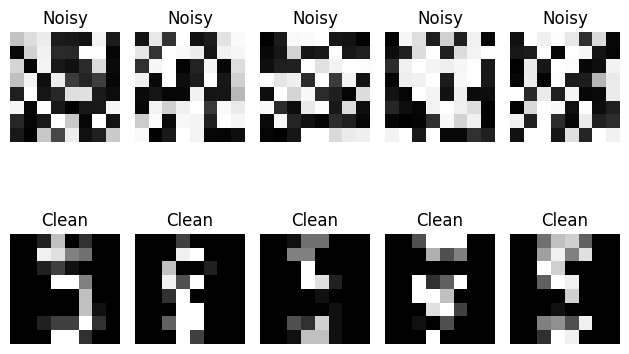

In [66]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
import numpy as np

mnist = load_digits()

X = mnist.data
y = X.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add noise
noise_train = np.random.normal(loc=0, scale=25, size=X_train.shape).astype(np.uint8)
X_train_noisy = np.clip(X_train + noise_train, 0, 255)

noise_test = np.random.normal(loc=0, scale=25, size=X_test.shape).astype(np.uint8)
X_test_noisy = np.clip(X_test + noise_test, 0, 255)

knn = KNeighborsClassifier(n_neighbors=5)
classifier = MultiOutputClassifier(knn, n_jobs=-1)
classifier.fit(X_train_noisy, y_train)

y_pred = classifier.predict(X_test_noisy)


num_samples = 5  
for i in range(num_samples):
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(X_test_noisy[i].reshape(8, 8), cmap='gray')
    plt.title('Noisy')
    plt.axis('off')

    plt.subplot(2, num_samples, i + 1 + num_samples)
    plt.imshow(y_pred[i].reshape(8, 8), cmap='gray')
    plt.title('Clean')
    plt.axis('off')

plt.tight_layout()
plt.show()


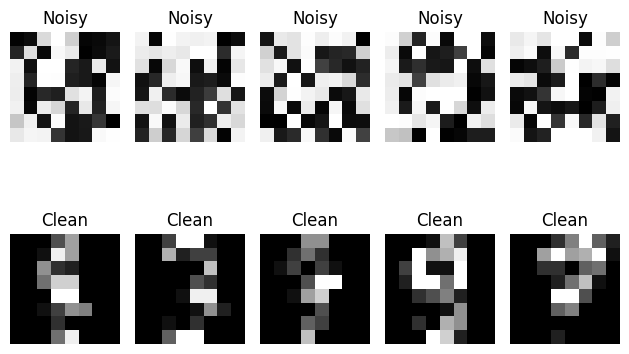

In [69]:
######################## improve the performance of the model
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import numpy as np

mnist = load_digits()

X = mnist.data
y = X.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add noise
noise_train = np.random.normal(loc=0, scale=25, size=X_train.shape).astype(np.uint8)
X_train_noisy = np.clip(X_train + noise_train, 0, 255)

noise_test = np.random.normal(loc=0, scale=25, size=X_test.shape).astype(np.uint8)
X_test_noisy = np.clip(X_test + noise_test, 0, 255)

# Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_noisy)
X_test_scaled = scaler.transform(X_test_noisy)

# Hyperparameter Tuning
param_grid = {
    'estimator__n_neighbors': [3, 5, 7],
    'estimator__weights': ['uniform', 'distance'],
    'estimator__p': [1, 2]
}

knn = KNeighborsClassifier()
classifier = MultiOutputClassifier(knn, n_jobs=-1)
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_estimator = grid_search.best_estimator_


y_pred = best_estimator.predict(X_test_scaled)


num_samples = 5  
for i in range(num_samples):
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(X_test_noisy[i].reshape(8, 8), cmap='gray')
    plt.title('Noisy')
    plt.axis('off')

    plt.subplot(2, num_samples, i + 1 + num_samples)
    plt.imshow(y_pred[i].reshape(8, 8), cmap='gray')
    plt.title('Clean')
    plt.axis('off')

plt.tight_layout()
plt.show()
